In [3]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load data
data = pd.read_csv('maslo.csv')

In [24]:
print(data.head())

   CSU_ID ITEM_NAME  YEAR  MONTH  CSU_AVG_PRICE  ROHLIK_AVG_PRICE  \
0  115101    Máslo   2020      1         170.14        294.485226   
1  115101    Máslo   2020      2         165.67        274.827594   
2  115101    Máslo   2020      3         167.56        282.438610   
3  115101    Máslo   2020      4         159.72        288.112619   
4  115101    Máslo   2020      5         151.52        285.307624   

   KOSIK_AVG_PRICE  ITESCO_AVG_PRICE  ROHLIK_DIFF_FROM_CSU  \
0       276.306700        244.830242           -124.345226   
1       276.721961        238.029167           -109.157594   
2       276.728205        238.394758           -114.878610   
3       272.837246        235.145833           -128.392619   
4       262.098102        232.495851           -133.787624   

   KOSIK_DIFF_FROM_CSU  ITESCO_DIFF_FROM_CSU  ROHLIK_MIN_PRICE  \
0          -106.166700            -74.690242             199.6   
1          -111.051961            -72.359167             179.6   
2          -10

In [25]:
data = data[['YEAR', 'MONTH', 'ROHLIK_AVG_PRICE']]

In [26]:
print(data.head())

   YEAR  MONTH  ROHLIK_AVG_PRICE
0  2020      1        294.485226
1  2020      2        274.827594
2  2020      3        282.438610
3  2020      4        288.112619
4  2020      5        285.307624


In [27]:
data['YEAR_MONTH'] = data.YEAR.astype(str) + '/' + data.MONTH.astype(str)

In [28]:
print(data.head())

   YEAR  MONTH  ROHLIK_AVG_PRICE YEAR_MONTH
0  2020      1        294.485226     2020/1
1  2020      2        274.827594     2020/2
2  2020      3        282.438610     2020/3
3  2020      4        288.112619     2020/4
4  2020      5        285.307624     2020/5


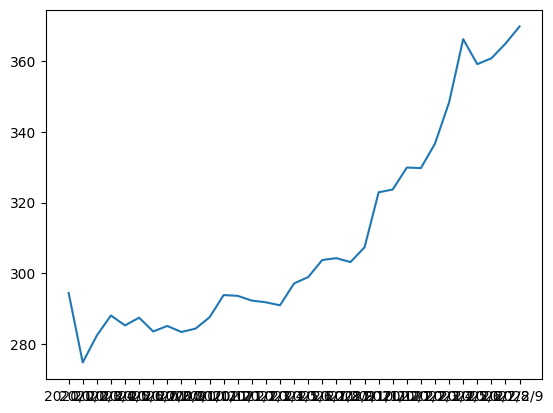

In [29]:
plt.plot(data['YEAR_MONTH'], data['ROHLIK_AVG_PRICE'])
plt.show()

In [30]:
from sklearn import linear_model
X_train = data[['YEAR', 'MONTH']]
y_train = data[['ROHLIK_AVG_PRICE']]

In [31]:
# Define the model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [32]:
# Generate forecast
d = {'YEAR': [2022, 2022, 2022, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023], 'MONTH': pd.Series([10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])}
X_val = pd.DataFrame(data=d, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [33]:
# Generate forecast
y_val = linear_regression.predict(X_val)

In [34]:
X_val['ROHLIK_AVG_PRICE'] = y_val

In [35]:
X_val['YEAR_MONTH'] = X_val.YEAR.astype(str) + '/' + X_val.MONTH.astype(str)

In [36]:
print(X_val.head())

   YEAR  MONTH  ROHLIK_AVG_PRICE YEAR_MONTH
0  2022     10        353.952055    2022/10
1  2022     11        355.891948    2022/11
2  2022     12        357.831842    2022/12
3  2023      1        369.930396     2023/1
4  2023      2        371.870289     2023/2


In [38]:
df = pd.concat([data, X_val])
df.tail(20)

,YEAR,MONTH,ROHLIK_AVG_PRICE,YEAR_MONTH
28,2022,5,366.195769,2022/5
29,2022,6,359.133298,2022/6
30,2022,7,360.782456,2022/7
31,2022,8,364.928125,2022/8
32,2022,9,369.776744,2022/9
0,2022,10,353.952055,2022/10
1,2022,11,355.891948,2022/11
2,2022,12,357.831842,2022/12
3,2023,1,369.930396,2023/1
4,2023,2,371.870289,2023/2


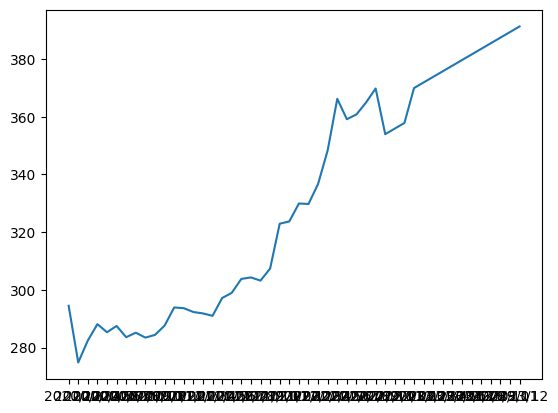

In [40]:
plt.plot(df['YEAR_MONTH'], df['ROHLIK_AVG_PRICE'])
plt.show()